In [1]:
from numpy import sin, cos, exp, pi
from numpy.linalg import norm
from scipy.constants import c
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
from time import sleep
from IPython.display import HTML

In [2]:
# generate theta and phi array
samples = 500
phi_samples = 20
resolution_theta = 2 * pi / samples
resolution_phi = pi / phi_samples

theta = np.arange(-pi, pi, resolution_theta) 
phi = np.arange(pi, 0, -resolution_phi)

frequency = 915 * (10**6)                                      # 915 MHz
wavelength = c / frequency

# -- Steer with just one angle --
# steering_angle = 60                                          
# w = steering_angle * 2 * pi / 360

# -- Steer with series of angles --
num_steering_angles = 10
steering_angles_theta_deg = np.arange(0, 180, num_steering_angles)                     
steering_angles_theta_rad = steering_angles_theta_deg * 2 * pi / 360

# steering_angles_phi_deg = np.arange(0, 180, 10)                     
# steering_angles_phi_rad = steering_angles_phi_deg * 2 * pi / 360

d = wavelength / 2                                              # element spacing
N = 4                                                           # num elements
k = (2* pi) / wavelength                                        # wavenumber    

In [3]:
def compute_pattern(w):
    theta_output = [0.0] * samples
    phi_output = [None] * phi_samples
    
    for phi_angle in range(0, phi_samples):
        for theta_angle in range(0, samples):
            sum_u = 0.0
            normalized = 0.0
            for i in range(0, N):
                    sum_u += exp(-(k * i * d * (sin(theta[theta_angle]) * sin(phi[phi_angle]) - cos(w))) * 1j)

            normalized = (1 / N) * abs(sum_u)**2
            theta_output[theta_angle] = normalized
            
        plt.polar(theta, theta_output)
        phi_output[phi_angle] = theta_output
        
    return phi_output

    

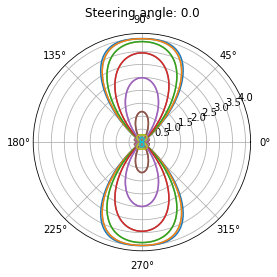

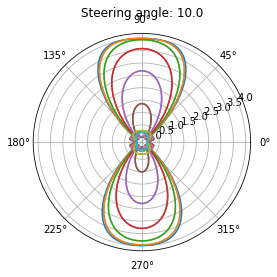

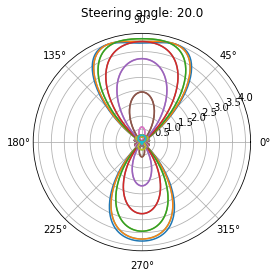

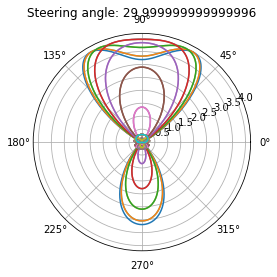

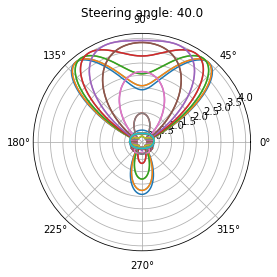

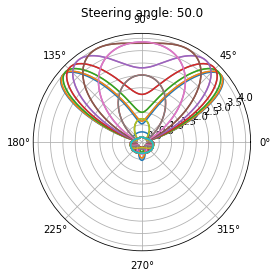

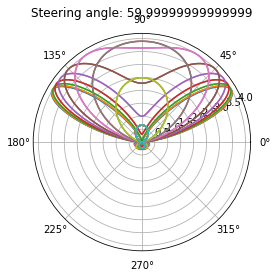

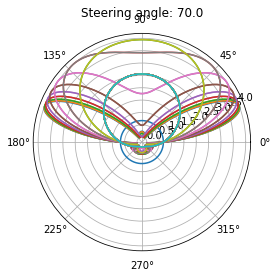

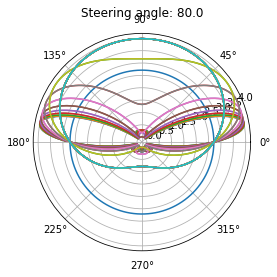

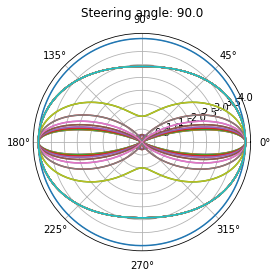

In [4]:
for ang in range(0, num_steering_angles):
    fig = plt.figure()                                       # plot individual patterns on diff figures
    ax = fig.add_subplot(1,1,1, polar=True)
    ax.set_title("Steering angle: " + str(360*steering_angles_theta_rad[ang] / (2*pi)))
    pattern = compute_pattern(steering_angles_theta_rad[ang])
    for idx in range(0, phi_samples):
        plt.polar(theta, pattern[idx])                                  # plot all patterns on one figure

In [21]:
# fig = plt.figure()
# ax = plt.subplot(polar = 'True')
# ax.set_ylim([0,4])
# ax.set_ylim([0,4])
# line, = plt.polar([], [], lw = 2)

# def init():
#     line.set_data([], [])
#     return line,

# def animate(i):
#     plt.clf()
#     x = theta
#     y = compute_pattern(steering_angles_theta_rad[i]
#     fig = plt.figure()  
#     for idx in range(0, phi_samples): 
#         plt.polar(x, y[idx], lw = 2)  
#     return fig

# # create animation
# myAnimation = animation.FuncAnimation(fig, animate,
#                                frames=np.arange(0,len(steering_angles_theta_rad)), interval=200, blit=False, repeat=True)

In [ ]:
# vid = myAnimation.to_html5_video()
# HTML(vid)